In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8)

# ReLU

In [ ]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(x, 0)

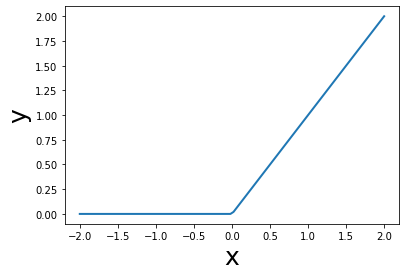

In [ ]:
# plot the ReLU function
xs = np.linspace(-2, 2, 100)
ys = relu(xs)
fig, ax = plt.subplots()
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(xs, ys, linewidth=2)
plt.show()

# Two-layer NN with ReLU

In [ ]:
# Create an array of inputs
xs = np.linspace(-2, 2, 100)
# Randomly initialize the weights
W1 = np.random.uniform(low=-1, high=1, size=(5,1))
b1 = np.random.uniform(low=-1, high=1, size=(5,1))
W2 = np.random.uniform(low=-1, high=1, size=(5,1))

In [ ]:
# Compute hidden layer activation and final output
first_layer_activations = relu(W1*xs + b1)
final_output = np.dot(W2.T, first_layer_activations)

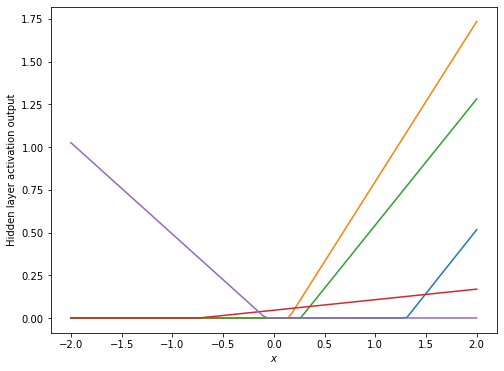

In [ ]:
# Plot the activation output of the five neurons in the hidden layer
plt.figure(figsize=(8,6))
plt.plot(np.tile(xs[:, None], 5), first_layer_activations.T);
plt.xlabel('$x$');
plt.ylabel('Hidden layer activation output');
# plt.yticks([]);

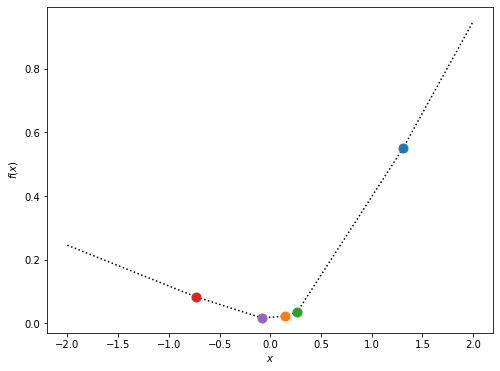

In [ ]:
# Final output
plt.figure(figsize=(8,6))
plt.plot(xs, final_output[0,:],'k:')
# Breakpoint is the input location where ReLU output is zero
breakpoints = (-b1/W1).T
# Calculate model output at the breakpoints
f_breakpoints = np.dot(W2.T, relu(W1*breakpoints + b1))
plt.plot(breakpoints, f_breakpoints, '.', markersize=18);
plt.xlabel('$x$');
plt.ylabel('$f(x)$');

# Deep NN

In [ ]:
# Define a two-neuron hidden layer
def layer(x):
    return 2*relu(x) + 2*relu(-x) - 2

# Stacking multiple hidden layers on top of each other
def multilayer(x, hidden_layers=1):
    # First layer returns just the input itself
    f = x
    # Sequentially pass the output of current layer as the input to the next layer
    for _ in range(hidden_layers):
      f = layer(f)
    return f

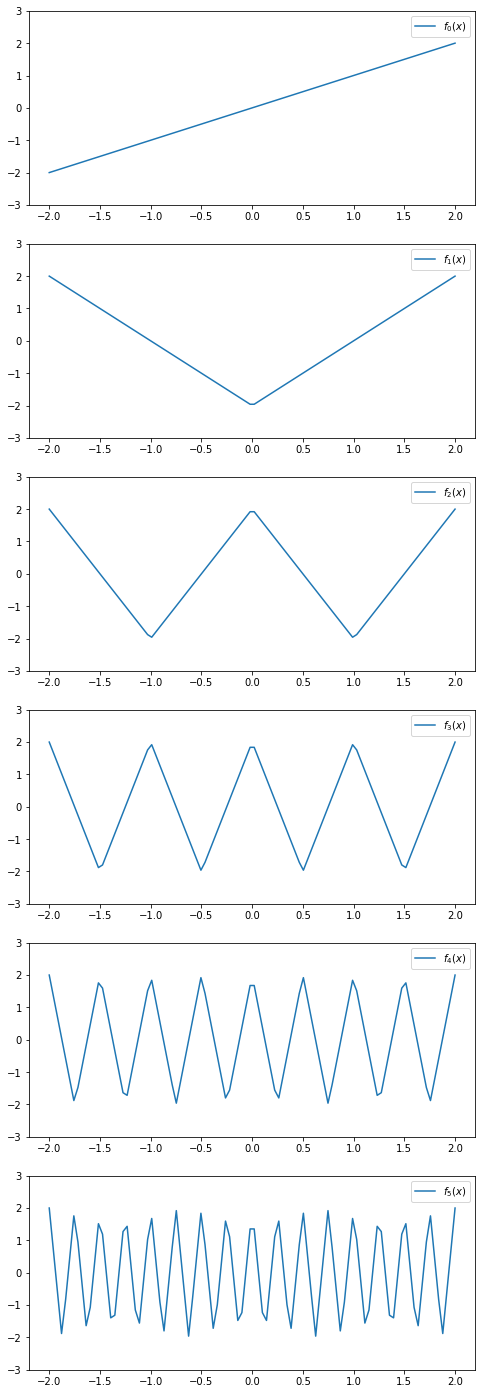

In [ ]:
# Sequentially change the number of hidden layers 
numlayers = 6
fig, axs = plt.subplots(numlayers, 1, figsize=(8,25))
for i, ax in enumerate(axs):
  ax.plot(xs, multilayer(xs, layers=i))
  ax.set_ylim([-3, 3])
  ax.legend(['$f_{}(x)$'.format(i)])